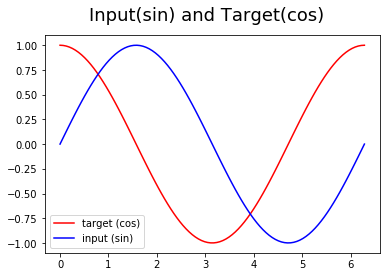

In [12]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
# torch.manual_seed(1) # reproducible
# Hyper Parameters
TIME_STEP = 10 # rnn time step
INPUT_SIZE = 1 # rnn input size
LR = 0.02 # learning rate
# show data
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps) # float32 for converting torch FloatTensor
y_np = np.cos(steps)
plt.figure(1)
plt.suptitle('Input(sin) and Target(cos)',fontsize='18')
plt.plot(steps, y_np, 'r-', label='target (cos)')
plt.plot(steps, x_np, 'b-', label='input (sin)')
plt.legend(loc='best')
# plt.show()

In [32]:
h_size = 36#number of rnn hidden units

class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(
        input_size=INPUT_SIZE,
        hidden_size=h_size, # rnn hidden unit
        num_layers=1, # number of rnn layer
        batch_first=True, # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )
        self.out = nn.Linear(h_size, 1)
    def forward(self, x, h_state):
         # x (batch, time_step, input_size)
         # h_state (n_layers, batch, hidden_size)
         # r_out (batch, time_step, hidden_size)
        r_out, h_state = self.rnn(x, h_state)
        outs = [] # save all predictions
        print(r_out.size(1))
        for time_step in range(r_out.size(1)): # calculate output for each time step
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state
 # instead, for simplicity, you can replace above codes by follows
 # r_out = r_out.view(-1, 32)
 # outs = self.out(r_out)
 # return outs, h_state
rnn = RNN()
print(rnn)

RNN(
  (rnn): RNN(1, 36, batch_first=True)
  (out): Linear(in_features=36, out_features=1, bias=True)
)


In [33]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR) # optimize all cnn parameters
loss_func = nn.MSELoss()
h_state = torch.zeros(1, 1, h_size) # for initial hidden state
plt.figure(2, figsize=(12, 5))
plt.suptitle('Using sin input to predict cos output',fontsize='18')
plt.ion() # continuously plot
for step in range(100):
    start, end = step * np.pi, (step+1)*np.pi # time range
    # use sin predicts cos
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32)
    x_np = np.sin(steps) # float32 for converting torch FloatTensor
    y_np = np.cos(steps)
    x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis]) # shape (batch, time_step, input_size)
    y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])
    prediction, h_state = rnn(x, h_state) # rnn output
    # !! next step is important !!
    h_state = h_state.data # repack the hidden state, break the connection from last iteration
    loss = loss_func(prediction, y) # cross entropy loss
    print(prediction)
    print(loss)
    optimizer.zero_grad() # clear gradients for this training step
    loss.backward() # backpropagation, compute gradients
    optimizer.step() # apply gradients
    # plotting
    # plt.text(0, 0, 'Loss=%.4f' % loss, fontdict={'size': 16, 'color': 'red'})
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw()
    print('loss : %f'%(loss))
plt.pause(0.1)
plt.ioff()
plt.show()

10
tensor([[[-0.0960],
         [-0.0689],
         [-0.1205],
         [-0.1434],
         [-0.1502],
         [-0.1480],
         [-0.1381],
         [-0.1226],
         [-0.1035],
         [-0.0831]]], grad_fn=<StackBackward>)
tensor(0.5609, grad_fn=<MseLossBackward>)
loss : 0.560881
10
tensor([[[0.1184],
         [0.0820],
         [0.0827],
         [0.1007],
         [0.1368],
         [0.1710],
         [0.1925],
         [0.1953],
         [0.1763],
         [0.1348]]], grad_fn=<StackBackward>)
tensor(0.5224, grad_fn=<MseLossBackward>)
loss : 0.522380
10
tensor([[[-0.0061],
         [ 0.0567],
         [ 0.0757],
         [ 0.0733],
         [ 0.0173],
         [-0.0524],
         [-0.1090],
         [-0.1310],
         [-0.1069],
         [-0.0288]]], grad_fn=<StackBackward>)
tensor(0.4683, grad_fn=<MseLossBackward>)
loss : 0.468252
10
tensor([[[0.0367],
         [0.0359],
         [0.1276],
         [0.2986],
         [0.5362],
         [0.7843],
         [0.9816],
         [

loss : 0.046319
10
tensor([[[-0.9993],
         [-1.0030],
         [-1.0418],
         [-0.8181],
         [-0.3831],
         [ 0.1391],
         [ 0.6013],
         [ 0.8933],
         [ 1.0326],
         [ 1.1201]]], grad_fn=<StackBackward>)
tensor(0.0276, grad_fn=<MseLossBackward>)
loss : 0.027580
10
tensor([[[ 0.9000],
         [ 0.9135],
         [ 0.9645],
         [ 0.7902],
         [ 0.4234],
         [-0.0207],
         [-0.4563],
         [-0.7972],
         [-0.9936],
         [-1.1117]]], grad_fn=<StackBackward>)
tensor(0.0238, grad_fn=<MseLossBackward>)
loss : 0.023829
10
tensor([[[-0.8866],
         [-0.8680],
         [-0.8963],
         [-0.6961],
         [-0.2890],
         [ 0.1515],
         [ 0.5296],
         [ 0.7826],
         [ 0.9164],
         [ 1.0167]]], grad_fn=<StackBackward>)
tensor(0.0089, grad_fn=<MseLossBackward>)
loss : 0.008920
10
tensor([[[ 0.8147],
         [ 0.7990],
         [ 0.8371],
         [ 0.6749],
         [ 0.3271],
         [-0.0488

loss : 0.312221
10
tensor([[[-0.9158],
         [-0.6394],
         [-0.1845],
         [ 0.3685],
         [ 0.7583],
         [ 0.9571],
         [ 0.9944],
         [ 0.9532],
         [ 0.9094],
         [ 0.8247]]], grad_fn=<StackBackward>)
tensor(0.2983, grad_fn=<MseLossBackward>)
loss : 0.298313
10
tensor([[[ 0.2272],
         [-0.2179],
         [-0.3154],
         [-0.2349],
         [-0.0315],
         [-0.0227],
         [-0.2803],
         [-0.6393],
         [-0.9958],
         [-1.0719]]], grad_fn=<StackBackward>)
tensor(0.3784, grad_fn=<MseLossBackward>)
loss : 0.378445
10
tensor([[[-0.3546],
         [ 0.2253],
         [ 0.4373],
         [ 0.3093],
         [-0.0532],
         [-0.1415],
         [ 0.1061],
         [ 0.5922],
         [ 1.0202],
         [ 0.9993]]], grad_fn=<StackBackward>)
tensor(0.4182, grad_fn=<MseLossBackward>)
loss : 0.418239
10
tensor([[[ 0.1712],
         [-0.3445],
         [-0.2946],
         [-0.0849],
         [ 0.1291],
         [ 0.0103

loss : 0.020529
10
tensor([[[ 0.9031],
         [ 0.8313],
         [ 0.7224],
         [ 0.4442],
         [ 0.1193],
         [-0.1654],
         [-0.4305],
         [-0.7148],
         [-0.9526],
         [-1.1518]]], grad_fn=<StackBackward>)
tensor(0.0060, grad_fn=<MseLossBackward>)
loss : 0.005984
10
tensor([[[-0.8129],
         [-0.7149],
         [-0.5518],
         [-0.2007],
         [ 0.2145],
         [ 0.4927],
         [ 0.7249],
         [ 0.9217],
         [ 1.1094],
         [ 1.2186]]], grad_fn=<StackBackward>)
tensor(0.0625, grad_fn=<MseLossBackward>)
loss : 0.062485
10
tensor([[[ 0.8199],
         [ 0.7143],
         [ 0.6318],
         [ 0.3878],
         [ 0.1084],
         [-0.1714],
         [-0.4225],
         [-0.7205],
         [-0.9448],
         [-1.1455]]], grad_fn=<StackBackward>)
tensor(0.0147, grad_fn=<MseLossBackward>)
loss : 0.014738
10
tensor([[[-0.7491],
         [-0.6892],
         [-0.5783],
         [-0.3266],
         [ 0.0723],
         [ 0.3370

KeyboardInterrupt: 

In [23]:
steps = np.linspace(start, end, TIME_STEP, dtype=np.float32)
x_np = np.sin(steps) # float32 for converting torch FloatTensor
y_np = np.cos(steps)

In [31]:
x.shape

torch.Size([1, 10, 1])